<a href="https://colab.research.google.com/github/Rohawaseem/Task-2/blob/main/week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📤 Please upload your 'twitter_sentiment_200.csv' file


Saving twitter_sentiment_200.csv to twitter_sentiment_200.csv
✅ File loaded successfully!
                               Tweet ID           Username  \
0  05a72860-7fbf-4565-a43c-961b732f0240  samanthagillespie   
1  0c3735c8-3d67-4c50-b639-14010e918d31            rfisher   
2  044365c9-0e4a-46ce-9a00-1e5d184ec5b7            bgarcia   
3  f37cc2c8-4ebf-483b-a970-ef9c2e0f4d37           robert13   
4  c78dd47e-df0d-47ff-9c29-de9287a96429         erinwalker   

                                          Tweet Text  Retweets  Favorites  \
0  Talk get bag focus pattern necessary. Step com...        81         14   
1  Front measure modern design. Policy go start f...        35         31   
2  Lead which daughter join. Yeah world sort pers...        94         13   
3  Morning first receive. Special land oil.\nWond...        75         54   
4  Artist church ago. Gun hold bank plan natural ...        11         27   

   Followers                   Timestamp Sentiment  
0        409  2022-11

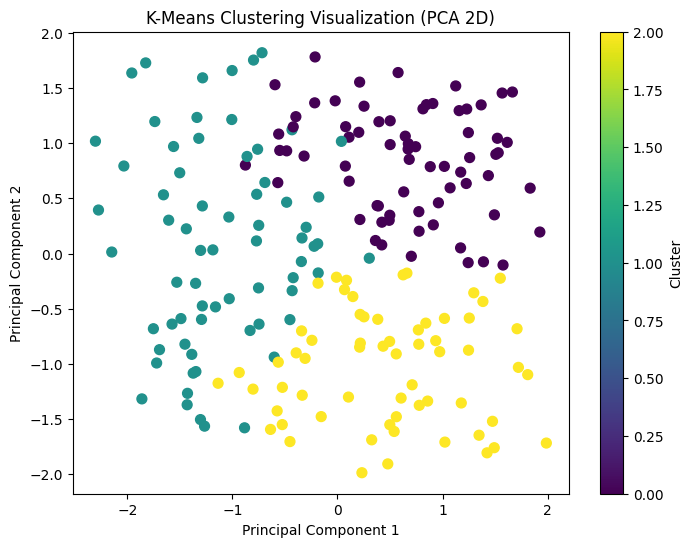


Cluster Centers (in PCA space):
[[ 0.65667009  0.83963026]
 [-1.10465449  0.0724863 ]
 [ 0.47015482 -1.02747075]]

💾 Clustered results saved as 'clustered_results.csv'


In [2]:


# Step 1: Install and import libraries
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 2: Upload  dataset
print("📤 Please upload 'twitter_sentiment_200.csv' file")
uploaded = files.upload()

# Step 3: Load dataset
data = pd.read_csv('twitter_sentiment_200.csv')
print("✅ File loaded successfully!")
print(data.head())

# Step 4: Preprocess data
# Select numeric columns only for clustering
numeric_data = data.select_dtypes(include=['number'])

# Handle missing values
numeric_data = numeric_data.fillna(numeric_data.mean())

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 5: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 6: Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Step 7: Visualize clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(data['PCA1'], data['PCA2'], c=data['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering Visualization (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Step 8: Print cluster centers (in PCA space)
centers = pca.transform(kmeans.cluster_centers_)
print("\nCluster Centers (in PCA space):")
print(centers)

# Step 9: Save clustered data
data.to_csv("clustered_results.csv", index=False)
print("\n💾 Clustered results saved as 'clustered_results.csv'")
